WARNING    Note that the synaptic pathway 'synapses_1_pre' will run on the clock of the group 'poissongroup_1' using a dt of 10. us. Either the Synapses object 'synapses_1' or the target 'neurongroup_1' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 10. us. If in doubt, try to ensure that 'poissongroup_1', 'synapses_1', and 'neurongroup_1' use the same dt. [brian2.synapses.synapses.synapses_dt_mismatch]


Number of spikes: [18]
Spike times: [ 0.0364  0.0626  0.1137  0.182   0.2479  0.293   0.3262  0.3755  0.4464
  0.4978  0.5599  0.6334  0.6896  0.7581  0.7942  0.8544  0.8903  0.9492] s


Text(0,0.5,'Membrane potential [mV]')

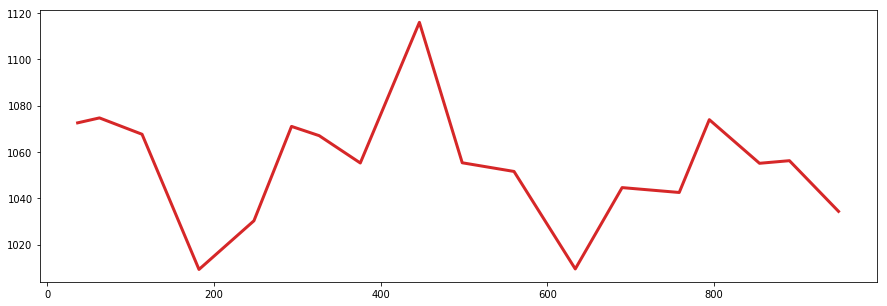

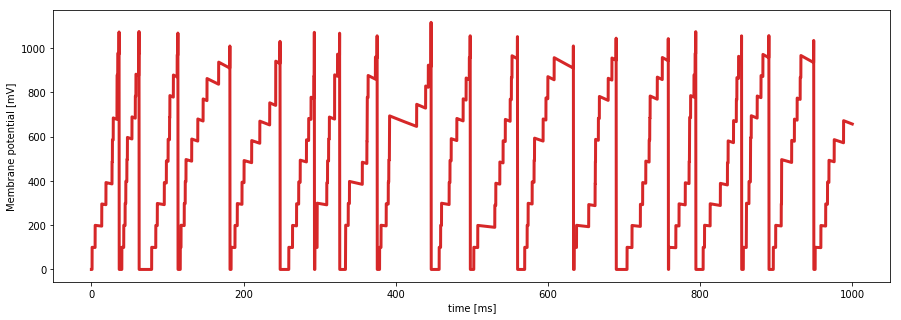

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 1*second
num_inputs = 10
input_rate = 20*Hz
weight = 0.1

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=input_rate, dt = 0.01*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

print("Number of spikes: %s" % spikemon.count[:])
print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.v/b2.mV, c='C3', lw=3)
fig = figure(figsize=(15, 5))
plt.plot(statemon.t/b2.ms, statemon.v[0]/b2.mV, c='C3', lw=3)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')

[0.065299999999999997, 0.045899999999999996, 0.044600000000000001, 0.058600000000000041, 0.04109999999999997, 0.061300000000000021, 0.054900000000000004, 0.039599999999999969, 0.041900000000000048, 0.078799999999999926, 0.05160000000000009, 0.081699999999999995, 0.040899999999999936, 0.11260000000000003, 0.059000000000000052]


Text(0.5,0,'ISI')

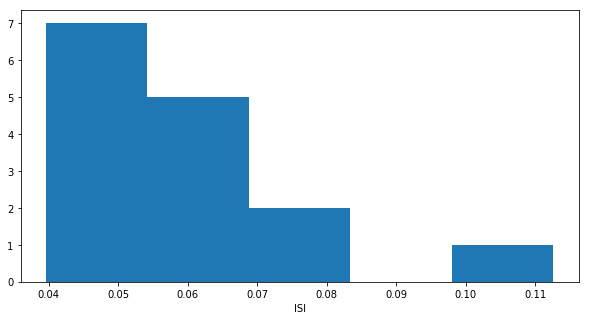

In [7]:
vector = list()
spikes = spikemon.count[:]
inter = full(len(spikes[:]), nan)
for idx in range(len(spikes)):
    for k in range(len(spikemon.t)-1):
        inter[idx] = (float(spikemon.spike_trains()[idx][k+1]) - float(spikemon.spike_trains()[idx][k]));
        vector.append(inter[idx])
        
               
print vector
fig = figure(figsize=(10, 5))
hist(vector, 5)
xlabel('ISI')